In [5]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

In [15]:
# load the dataset
X, y = load_planar_dataset()
X.shape, y.shape

((2, 400), (1, 400))

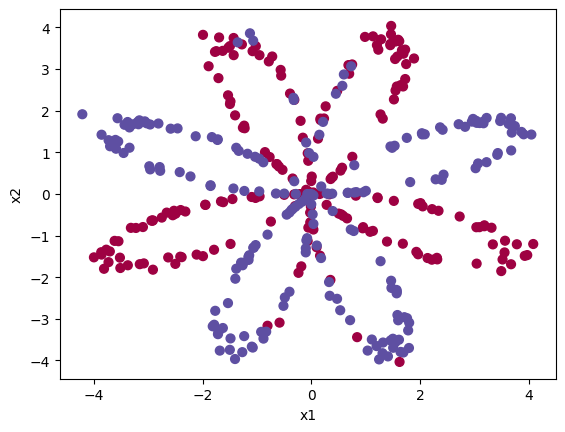

In [20]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);
plt.xlabel('x1');
plt.ylabel('x2');
plt.show();

In [23]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [153]:
# let's define a function to get the layer sizes

def layer_sizes():
    return (X.shape[0], 8, y.shape[0])

In [154]:
layer_sizes()

(2, 8, 1)

In [155]:
# let's define the sigmoid function
def sigmoid(Z):
    return 1. / (1. + np.exp(-Z))

In [29]:
# uniform(0, 1)
# help(np.random.rand)

In [156]:
# let's define a function to initialize parameters

def initialize_parameters(nx, nh, ny):
    W1 = np.random.rand(nh, nx) 
    b1 = np.zeros((nh, 1))
    W2 = np.random.rand(ny, nh) 
    b2 = np.zeros((1, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters

In [157]:
n_x, n_h, n_y = layer_sizes()

params = initialize_parameters(nx=n_x, nh=n_h, ny=n_y)
params

{'W1': array([[0.67837697, 0.50318069],
        [0.23090845, 0.17489651],
        [0.18498297, 0.84426001],
        [0.98258979, 0.91373962],
        [0.34736942, 0.78022458],
        [0.54645459, 0.8164424 ],
        [0.48372695, 0.5899513 ],
        [0.78726345, 0.10023464]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[0.53700712, 0.36598335, 0.60430684, 0.95880252, 0.39282294,
         0.392973  , 0.79063699, 0.6450784 ]]),
 'b2': array([[0.]])}

In [158]:
# let's compute the forward propagation

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # let's compute
    Z1 = np.dot(W1, X) + b1
    
    # in the hidden layer we are using tanh activation function
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # sigmoid activation in the output layer
    
    forward_cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return forward_cache

In [159]:
(forward_propagation(X, params)['A2'] - y).shape

(1, 400)

In [160]:
forward_propagation(X, params)['Z1'].shape

(8, 400)

In [161]:
# let's define the cost function

def compute_cost(AL, y, m=m):
    first_term = np.sum(y * np.log(AL))
    second_term = np.sum((1-y) * np.log(1-AL))
    
    cost = (-1./m) * (first_term + second_term)
    
    return cost

In [162]:
compute_cost(AL=forward_propagation(X, params)['A2'], y=y)

1.893556291830049

In [163]:
# let's get the derivative of tanh(z)

def derivative_tanh(Z):
    return 1 - (np.tanh(Z) * np.tanh(Z))

In [175]:
# now, let's do the backward propagation

def backward_propagation(X, y, parameters, forward_cache, m=m):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = forward_cache['A1']
    A2 = forward_cache['A2']
    Z1 = forward_cache['Z1']
    Z2 = forward_cache['Z2']
    
    # difference at the output layer
    diff = (A2 - y)
    
    dW2 = (1./m) * np.dot(diff, A1.T)
    db2 = (1./m) * np.sum(diff, axis=1, keepdims=True)
    
    # loss wrt to Z1
    dZ1 = np.dot(W2.T, diff) * derivative_tanh(Z1)
    
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    

    
    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }
    
    return gradients

In [176]:
backward_propagation(X, y, params, forward_cache=forward_propagation(X, params))['dW2'].shape

(1, 8)

In [177]:
backward_propagation(X, y, params, forward_cache=forward_propagation(X, params))['db1'].shape

(8, 1)

In [178]:
# let's define a function to updates the parameters

def update_parameters(parameters, gradients, lr=0.001):
    # parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # gradients
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    # update each parameters
    W1 = W1 - (lr * dW1)
    b1 = b1 - (lr * db1)
    W2 = W2 - (lr * dW2)
    b2 = b2 - (lr * db2)
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [179]:

def nn_model(X, y, num_iterations=10000, lr=0.001, print_cost=True):
    
    n_x, n_h, n_y = layer_sizes()
    
    parameters = initialize_parameters(nx=n_x, nh=n_h, ny=n_y)
    
    costs = []
    # Loop (gradient descent)

    for i in range(num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        forward_cache = forward_propagation(X=X, parameters=parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(AL=forward_cache['A2'], y=y)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        gradients = backward_propagation(X=X, y=y, 
                                    parameters=parameters, 
                                    forward_cache=forward_cache)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters=parameters, 
                                    gradients=gradients, 
                                    lr=lr)
        
        # Print the cost every 500 iterations
        if print_cost and (i % 500 == 0):
            print(f"Cost at {i}th iteration is: {cost}\n")
        
        costs.append(cost)

    return parameters, costs

In [182]:
n_iterations = 20000

opt_params, costs = nn_model(
    X=X,
    y=y,
    num_iterations=n_iterations,
    lr=0.2
)

Cost at 0th iteration is: 1.792110069379485

Cost at 500th iteration is: 0.3408625731980792

Cost at 1000th iteration is: 0.31788752768387046

Cost at 1500th iteration is: 0.3023517200209062

Cost at 2000th iteration is: 0.29037229654384505

Cost at 2500th iteration is: 0.2807642335136145

Cost at 3000th iteration is: 0.26971656761499485

Cost at 3500th iteration is: 0.25795303072758613

Cost at 4000th iteration is: 0.25127158361634067

Cost at 4500th iteration is: 0.24536556288772127

Cost at 5000th iteration is: 0.2368534807623651

Cost at 5500th iteration is: 0.2298855741736302

Cost at 6000th iteration is: 0.22426839001094126

Cost at 6500th iteration is: 0.21941043164873694

Cost at 7000th iteration is: 0.2150919255454969

Cost at 7500th iteration is: 0.21133030016745882

Cost at 8000th iteration is: 0.2081034617296025

Cost at 8500th iteration is: 0.2053311123373401

Cost at 9000th iteration is: 0.2029220323312587

Cost at 9500th iteration is: 0.20079855389417603

Cost at 10000th

In [183]:

# Plot the cost over iterations
def plot_cost_over_iterations(n_iterations, costs):
    
    plt.figure(figsize=(6, 4))  # Set the figure size

    # Plot the costs over iterations
    plt.plot(range(n_iterations), costs, color='b', linewidth=2, label='Cost')

    # Customizing the plot
    plt.xlabel('Iterations', fontsize=10)
    plt.ylabel('Cost', fontsize=10)
    plt.title(f'Cost Function Over Iterations', fontsize=12)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a legend
    plt.legend(loc='best', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

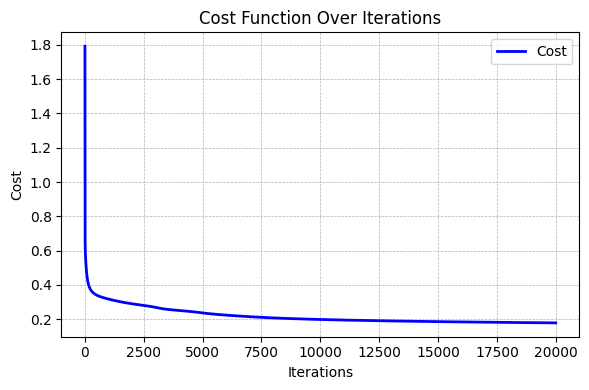

In [184]:
plot_cost_over_iterations(n_iterations=n_iterations, costs=costs)

In [185]:
opt_params

{'W1': array([[-6.08389689, -6.4718046 ],
        [ 0.04182102,  6.70995107],
        [ 6.08484503, -6.59941489],
        [ 5.35907182,  2.40797716],
        [ 0.03018497,  6.95413534],
        [ 0.77718519,  1.02238552],
        [ 7.39292159, -2.32796014],
        [ 0.17811144,  2.80437513]]),
 'b1': array([[ 0.07040597],
        [ 0.09541188],
        [ 0.05806117],
        [-0.25417781],
        [ 0.09790619],
        [ 0.30551316],
        [ 0.13947205],
        [ 0.1823144 ]]),
 'W2': array([[ 8.01924496,  4.45166181,  9.19595842,  4.64332166,  4.70457192,
         -3.66971133, -4.38841403,  1.88239037]]),
 'b2': array([[0.2708685]])}

In [186]:
def predict(parameters, X):
    cache = forward_propagation(parameters=parameters, X=X)
    predictions = cache['A2'] > 0.5
    
    return predictions

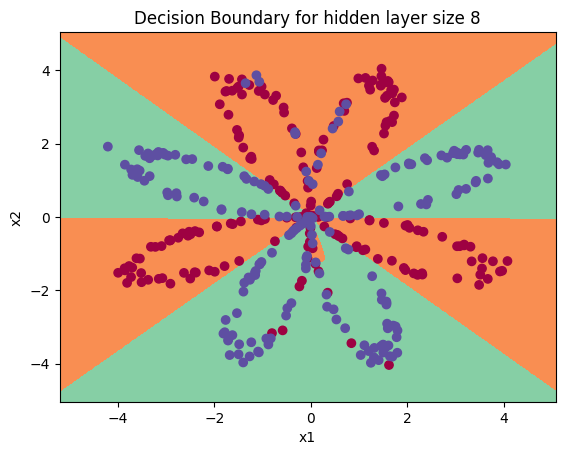

In [187]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(opt_params, x.T), X, y)
plt.title(f"Decision Boundary for hidden layer size 8")
plt.show()